## Data Powered Postive Deviance (DPPD) Analysis

In this notebook we will show how to perform DPPD Analysis through time series decomposition. The DPPD Analysis will be based on the amount of agricultural fires that have been detected in a specific area. The DPPD analysis can be easily done on Telangana, district, mandal, 10 km grid and, 1 km grid level (depending on what boundaries are available).

In [37]:
import pandas as pd
import os
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import rasterio
from statsmodels.tsa.seasonal import STL
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime as dt
from matplotlib.colors import TwoSlopeNorm 
import time
import sys

sys.path.append(os.path.abspath("c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Functions"))
import dppd

In [38]:
import importlib
importlib.reload(dppd)

<module 'dppd' from 'c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Functions\\dppd.py'>

First it is important that the following packages are installed on your computer:

Then we will load all different boundary files in the notebook. Here the paths need to be changed accordingly to where the boundary files have been saved.

In [5]:
#Load Data
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\src\\data_preprocessing\\base_geojson')
mandal = gpd.read_file('TS_mandal_boundary.json')
district = gpd.read_file('TS_district_boundary.json')

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Classification_Fires')
#fire_data_classified = pd.read_csv('fires_data_classified.geojson', index_col=0)
fire_data_classified = gpd.read_file('fires_data_classified.geojson')
#Select only the agricultural fires
fire_data = fire_data_classified[fire_data_classified['agricultural'] == 1]

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\src\\data_preprocessing\\base_geojson')
shape_telangana = gpd.read_file('TL_state_shapefile_for_clip.geojson')
shape_telangana = shape_telangana.explode()

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\src\\data_preprocessing\\tsdm\\')
district_boundaries = gpd.read_file('District_Boundary.shp')
district_boundaries = district_boundaries.reset_index()

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Mandal_boundaries_pre')
mandal_boundaries = gpd.read_file('mandal_boundaries.shp')
mandal_boundaries = mandal_boundaries.reset_index()

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\DPPD_Jesse\\Data')
one_km_grid = gpd.read_file('telangana_1km_grid.geojson')
one_km_grid = one_km_grid.reset_index()

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\DPPD_Jesse\\Data')
ten_km_grid = gpd.read_file('telangana_10km_grid.geojson')
ten_km_grid = ten_km_grid.reset_index()

In [10]:
#Load Data
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\src\\data_preprocessing\\base_geojson')
mandal = gpd.read_file('TS_mandal_boundary.json')
district = gpd.read_file('TS_district_boundary.json')

In order to determine the trend score of a specific area, we first subtract the seasonality of the fire line. We do this by using the, Seasonal-Trend Decomposition Procedure Based on the Loess algorithm (STL). We choose this method over the classicial approach: Moving Averages (MA), because STL can handle any type of seasonality, the user can control the rate of change of the seasonal component, it is robust to outliers, and it does not have any missing trend values unlike MA (https://towardsdatascience.com/different-types-of-time-series-decomposition-396c09f92693). After we have obtained the trend, we want to give it a score. A negative score will indicate a decrease in fires, a postive score will indicate an increase in fires, and a score close to zero will indicate little to no change in the amount of fires. This score is determined based on the trend line. We obtain one score for each selected are by fitting a line to the trend by using Linear Regression. The slope of this line will indicate the deviance score of that particular area.

We can now call our function with the parameters we are interested in. For the fire data we only have it available for the years 2015-2019 and for the boundaries we can do the analysis on telangana, district, mandal, 10 km or 1 km level.

Scores are calculated in 0.08578431208928426  minutes


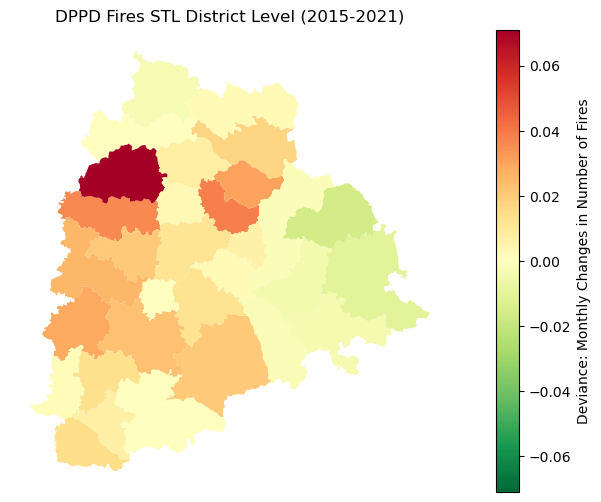

File is saved.


In [39]:
figure, DPPD_df_district_fires_2015_2021 = dppd.dppd_fires(2015, 2021, fire_data, district_boundaries, 'District', 'fires')

#Save it in right format for on Dicra Platform
dppd.save_dicra(DPPD_df_district_fires_2015_2021, district_boundaries, district, 'DPPD_fires_district_2015_2021', 'district')

Scores are calculated in 0.10152851343154908  minutes


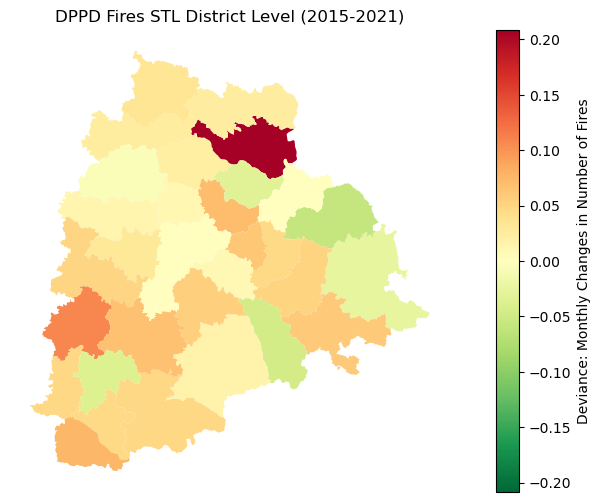

In [16]:
figure, DPPD_df_district_2021 = dppd.dppd_fires(2015, 2021, fire_data, district_boundaries, 'District', 'frp')

Scores are calculated in 0.37300365368525185  minutes


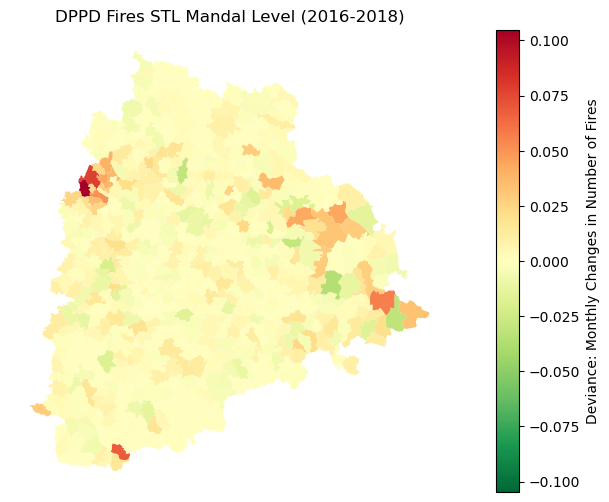

In [11]:
figure, DPPD_df_mandal_2021 = dppd.dppd_fires(2016, 2018, fire_data, mandal_boundaries, 'Mandal', 'fires')

Scores are calculated in 0.412228000164032  minutes


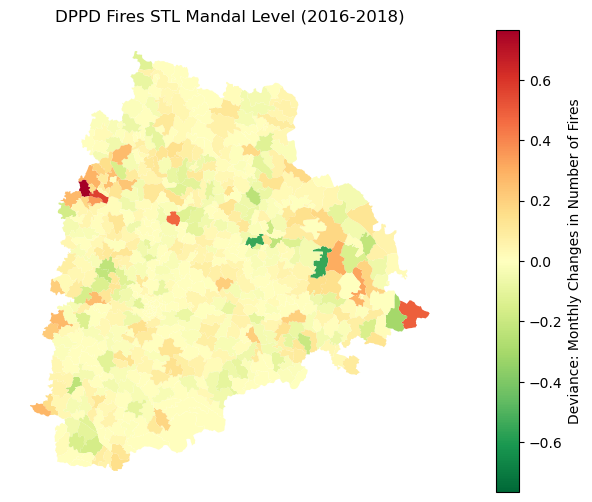

In [17]:
figure, DPPD_df_mandal_2021 = dppd.dppd_fires(2016, 2018, fire_data, mandal_boundaries, 'Mandal', 'frp')

c:\Users\Jesse\Anaconda3\envs\gurobi\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
<ipython-input-89-2e304ff66fda>:12: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  geo_fire_data = gpd.GeoDataFrame(fire_data,geometry = fire_data.geometry, crs = {'init': 'epsg:4326'})
<ipython-input-89-2e304ff66fda>:17: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame

Scores are calculated in 0.5511925299962361  minutes


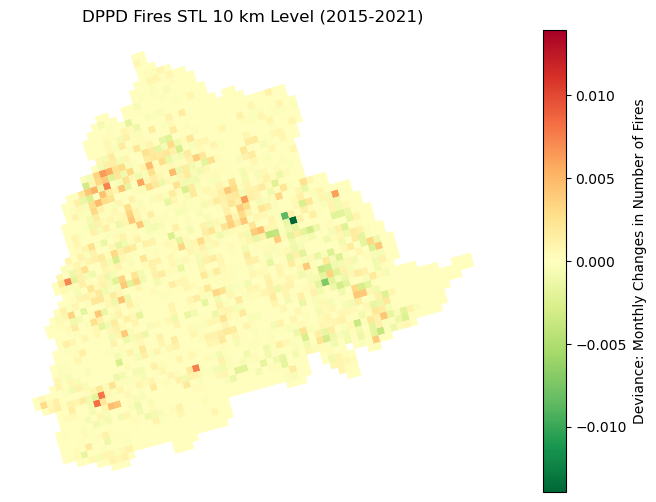

In [99]:
figure, DPPD_df_10km_2021 = dppd.dppd_fires(2015, 2021, fire_data, ten_km_grid, '10 km', 'fires')

c:\Users\Jesse\Anaconda3\envs\gurobi\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
<ipython-input-89-2e304ff66fda>:12: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  geo_fire_data = gpd.GeoDataFrame(fire_data,geometry = fire_data.geometry, crs = {'init': 'epsg:4326'})
<ipython-input-89-2e304ff66fda>:17: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame

Scores are calculated in 9.201371884346008  minutes


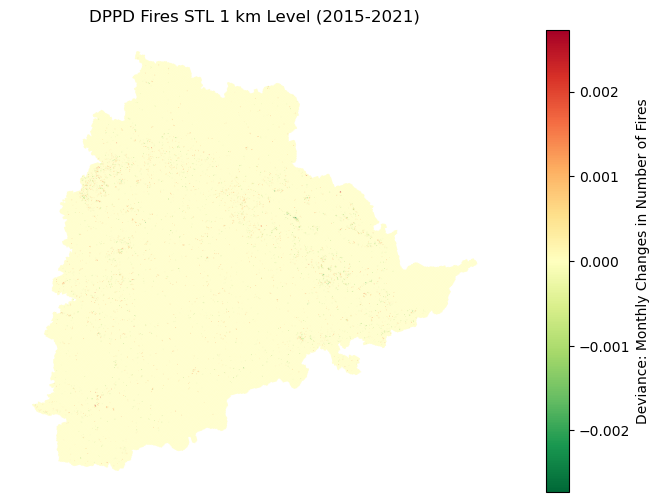

In [100]:
figure, DPPD_df_1km_2021 = dppd.dppd_fires(2015, 2021, fire_data, one_km_grid, '1 km', 'fires')